# BioImagePy: metadata manipulation tutorial

In order to avoid using databases like sql to manipulate metadata for scientific data manipulation, we defined a set of rules to annotates data with text files. These text files are metadata files stored with the `.md.json` extension: *md* for metadata and *json* for the Json format.

Data are represented using 3 levels:
1. **Data**: a single data is made of one or several data files and one single `.md.json` file. A *Data* can be a *RawData* if it comes from an acquisition system or a *ProcessedData* if it is a *Data* obtained by processing any other *Data*,
2. **DataSet**: a collection of *Data* described in a `.md.json` file. We define two types of *DataSets*: a *RawDataSet* contains a collection of *RawData*, and a *ProcessedDataSet* contains a collection of *ProcessedData*,
3. **Experiment**: contains one *RawDataSet*, the images to be analysed, and a list of *ProcessedDataSet*, one for each process applied to the *Data*. The *Experiment* is described by a `.md.json` file.

**BioImagePy** is a python library that allows to manipulate *Data*, *Datasets* and *Experiments* with a set of high level functions without needing to manualy edit `.md.json` files.

The more common usage of **BioImagePy** is following this *Data* manipulation steps: 
1. Create an *Experiment*
2. Import data to the *Experiment*
3. Tag Data 
4. Process data. 
with goings and comming between steps 2 to 4

This first tutorial cover the step 1, 2 and 3.

## Install BioImagePy

If **BioImagePy** is not installed in your environment:

In [1]:
import sys

# this is an optional command to install BioImagePy from conda if you do not have yet installed BioIMagePy
#!conda install --yes --prefix {sys.prefix} /Users/sprigent/anaconda3/conda-bld/osx-64/bioimagepy-0.1.0-py37_0.tar.bz2

# this is an optional command to link BioImagePy from local directory
sys.path.append("../bioimagepy") # Change this path to the bioimagepy directory


# Import the experiment module and display the help to test if the installation is working
import bioimagepy.experiment as experimentpy
help(experimentpy)


Help on module bioimagepy.experiment in bioimagepy:

NAME
    bioimagepy.experiment - experiment module.

DESCRIPTION
    This module contains the BiExperiment class that allows to read/write and query
    an experiment metadata, and a set of function to manipulate experiment metadata
    
    Example
    -------
        Here is an example of how to create an experiment and add data to it:
    
            >>> import bioimagepy.metadata.experiment as experiment
            >>> myexperiment = experiment.create('myexperiment', 'Sylvain Prigent', './' )
            >>> experiment.import_data(experiment_path: str, data_url: str, name: str, author: str, datatype: str, createddate: str = 'now', copy_data: bool = True)
            >>> experiment.import_dir(experiment_path: str, dir_path: str, author: str, datatype: str, createddate: str = 'now', copy_data: bool = True)
            >>> myexperiment.addTag('condition1')
            >>> myexperiment.addTags(['condition1, condition2'])
          

## Create an experiment

To create an *Experiment* we need first to import the `experiment` module from `bioimagepy.experiment`.
Then we call the function `create` to create the *Experiment*. The three parameters are:
1. **name**: the name of the experiment
2. **author**: the person who create the experiment
3. **path**: the directory where the experiment will be create

In [2]:
import bioimagepy.experiment as experiment

## create an experiment
my_experiment = experiment.create(name="myexperiment", 
                                  author="Sylvain Prigent", 
                                  path="./") 

print("experiment created")

experiment created


The *Experiment* has been created in the same directory as this notebook in the folder *./myexperiment*. The function "list_files" below shows the actual content of the expeiment folder: 

In [4]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print('{}{}'.format(subindent, f))
            
list_files('./myexperiment')            

myexperiment/
    experiment.md.json
    data/
        rawdataset.md.json


In the root directory of the *Experiment*, there is the `experiment.md.json` metadata file. This is the file describing the experiment. Lets read it:

In [5]:
with open('./myexperiment/experiment.md.json', 'r') as fin:
    print(fin.read())

{
    "information": {
        "name": "myexperiment",
        "author": "Sylvain Prigent",
        "createddate": "2019-07-19"
    },
    "rawdataset": "data/rawdataset.md.json",
    "processeddatasets": []
}


The file contains three 'sections':
1. **information**: contains the basic information of the *Experiment* we gave when we call the `experiment.create` function, and the createddate.
2. **rawdataset**: the directory where the *RawDataSet* metadata are stored. The *data/* directory and the `rawdatates.md.json` file have been created
3. **proceeseddatasets**: the list of *ProcessedDataSet* path, that is empty for now since no processing has been performed.

Let open the `rawdataset.md.json` file:

In [6]:
with open('./myexperiment/data/rawdataset.md.json', 'r') as fin:
    print(fin.read())

{
    "name": "data",
    "urls": []
}


This metadata file contains the description of the *RawDataSet*. The name of the dataset (data) and 'urls' the list of all the *RawData*. For now the dataset is empty. In the next session, we import data in the project.

## Import data

Data import into an *Experiment* can be done with two functions: `experiment.import_data()` to import a single data or `experiment.import_dir()` to import multiple data from a directory. In this tutorial, we will import the data from a directory containing syntetic data samples. This syntetic data samples are located in the directory *'./synthetic_data/data/'* in the same directory of this notebook: 

In [7]:
list_files('./synthetic_data/data/') 

/
    population1_001.tif
    population1_002.tif
    population1_003.tif
    population1_004.tif
    population1_005.tif
    population1_006.tif
    population1_007.tif
    population1_008.tif
    population1_009.tif
    population1_010.tif
    population1_011.tif
    population1_012.tif
    population1_013.tif
    population1_014.tif
    population1_015.tif
    population1_016.tif
    population1_017.tif
    population1_018.tif
    population1_019.tif
    population1_020.tif
    population2_001.tif
    population2_002.tif
    population2_003.tif
    population2_004.tif
    population2_005.tif
    population2_006.tif
    population2_007.tif
    population2_008.tif
    population2_009.tif
    population2_010.tif
    population2_011.tif
    population2_012.tif
    population2_013.tif
    population2_014.tif
    population2_015.tif
    population2_016.tif
    population2_017.tif
    population2_018.tif
    population2_019.tif
    population2_020.tif


This data set contains 40 `.tif` images separated in two populations of 20 images. These images are 128*128 2D images containing spots and noise. Population1 images contains an average of 3.4 spots and Population2 images contains an average of 4.7 spots. Let visualize two samples:

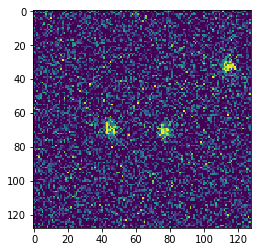

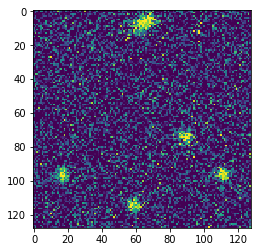

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./synthetic_data/data/population1_001.tif')
imgplot = plt.imshow(img)
plt.show()
img2=mpimg.imread('./synthetic_data/data/population2_001.tif')
imgplot = plt.imshow(img2)
plt.show()

To import the data in the experiment, we just need to call the `experiment.import_dir()` function from the experiment module:

In [10]:
# import the data
experiment.import_dir(experiment=my_experiment, 
                      dir_path='./synthetic_data/data/', 
                      filter="\.tif$", 
                      author='Sylvain Prigent', 
                      datatype='image', 
                      createddate='2019-03-17', 
                      copy_data=True)

# show the experiment directory
list_files('./myexperiment') 

myexperiment/
    experiment.md.json
    data/
        population1_001.md.json
        population1_001.tif
        population1_002.md.json
        population1_002.tif
        population1_003.md.json
        population1_003.tif
        population1_004.md.json
        population1_004.tif
        population1_005.md.json
        population1_005.tif
        population1_006.md.json
        population1_006.tif
        population1_007.md.json
        population1_007.tif
        population1_008.md.json
        population1_008.tif
        population1_009.md.json
        population1_009.tif
        population1_010.md.json
        population1_010.tif
        population1_011.md.json
        population1_011.tif
        population1_012.md.json
        population1_012.tif
        population1_013.md.json
        population1_013.tif
        population1_014.md.json
        population1_014.tif
        population1_015.md.json
        population1_015.tif
        population1_016.md.json
        population1_0

The parameters of the `experiment.import_dir()` function are this following: 
1. `experiment` is the experiment where we want to import the data, 
2. `dir_path` is the directory where the origin data are. 
3. `filter` is a regular expression not to import all the files from the `dir_path` but only specific ones. Here we select only the files that ends with *.tif*. 
4. `author` is the data author name for the common metadata, 
5. `datatype` is the data type for the common metadata, 
6. `createddate` is the data created date for the common metadata, 
7. `copy_data` option specify if we want to copy or not the data. 

Here since the data are small, we decided to copy them. If we do not copy the data, only the `.md.json` files will be created. Let open the `rawdataset.md.json` metadata file:

In [11]:
with open('./myexperiment/data/rawdataset.md.json', 'r') as fin:
    print(fin.read())

{
    "name": "data",
    "urls": [
        "population1_001.md.json",
        "population1_015.md.json",
        "population1_014.md.json",
        "population1_016.md.json",
        "population1_002.md.json",
        "population1_003.md.json",
        "population1_017.md.json",
        "population1_013.md.json",
        "population1_007.md.json",
        "population1_006.md.json",
        "population1_012.md.json",
        "population1_004.md.json",
        "population1_010.md.json",
        "population1_011.md.json",
        "population1_005.md.json",
        "population2_016.md.json",
        "population2_002.md.json",
        "population2_003.md.json",
        "population2_017.md.json",
        "population2_001.md.json",
        "population2_015.md.json",
        "population2_014.md.json",
        "population2_004.md.json",
        "population2_010.md.json",
        "population2_011.md.json",
        "population2_005.md.json",
        "population2_013.md.json",
        "population

Now it contains the relative paths to all the *RawData* metadata files. Let see the content of a *RawData* metadata file:

In [14]:
with open('./myexperiment/data/population1_001.md.json', 'r') as fin:
    print(fin.read())

{
    "common": {
        "name": "population1_001.tif",
        "author": "Sylvain Prigent",
        "datatype": "image",
        "createddate": "2019-03-17",
        "url": "population1_001.tif"
    },
    "origin": {
        "type": "raw"
    }
}


The *common* section contains the metadata we specified during the import and the relative url of the data file `population1_001.tif`. We can notice the *origin* section which specify that this data is of type raw.

In this tutorial, we manually read the `.md.json` files for a didactic purpose. In normal use of **BioImagePy**, we do not do it, since these file are the backend of **BioImagePy**. Now that you know how it works in the backend, we can use the high level display functions of **BioImagePy**. 

To display the content (metadata, and *RawData* ) of an *Experiment*, we just need to call the `diplay()` method on an experiment:

In [15]:
import bioimagepy.experiment as experiment

# Display the experiment
my_experiment.display()

--------------------
Experiment: 
	Name: myexperiment
	Author: Sylvain Prigent
	Created: 2019-07-19
	RawDataSet: 
+---------------------+-----------------+--------------+
|         Name        |      Author     | Created date |
+---------------------+-----------------+--------------+
| population1_001.tif | Sylvain Prigent |  2019-03-17  |
| population1_015.tif | Sylvain Prigent |  2019-03-17  |
| population1_014.tif | Sylvain Prigent |  2019-03-17  |
| population1_016.tif | Sylvain Prigent |  2019-03-17  |
| population1_002.tif | Sylvain Prigent |  2019-03-17  |
| population1_003.tif | Sylvain Prigent |  2019-03-17  |
| population1_017.tif | Sylvain Prigent |  2019-03-17  |
| population1_013.tif | Sylvain Prigent |  2019-03-17  |
| population1_007.tif | Sylvain Prigent |  2019-03-17  |
| population1_006.tif | Sylvain Prigent |  2019-03-17  |
| population1_012.tif | Sylvain Prigent |  2019-03-17  |
| population1_004.tif | Sylvain Prigent |  2019-03-17  |
| population1_010.tif | Sylvain

## Tag the RawData

One of the main advantage of the **BioImageIT** storage system with `.md.json` files is to be able to add tags to each `RawData`. With this tags, we will be able to query the data. 

For example, when we will analyse the data, we will need to perform a statistical test to determine if the *Population 1* and the *Population 2* have statistically different number of spots. Without tagging, we need to write a script that list and parse the *RawData* files and sort the data to analyse results depending on the image names (starting with *population1* or *population2*). With the tagging system, we only need to query **BioImagePy** to get the data containing the label *Population1* and *Population2* separatly.

But first we need to tag the *RawData* !

Each *RawData* file store the tags of it corresponding data, and the `experiment.md.json` file store the list of tags that are used in the *Experiment*.
Tags edition can be done manually with the dedicated methods of the classes *BiRawData* and *BiExperiment* (see **BioImagePy** documentation). Nevertheless it is tedious. Thus, **BioImagePy** have a set of functions (starting with `tag\_`) to automatically tags the `RawData` from the data files names:


In [16]:

# Add the tag 'Population' to the experiment and extract the 
# values 'population1' and 'population2' from the images names
experiment.tag_rawdata_from_name(my_experiment, "Population", ['population1', 'population2'] )
my_experiment.display()

--------------------
Experiment: 
	Name: myexperiment
	Author: Sylvain Prigent
	Created: 2019-07-19
	RawDataSet: 
+---------------------+-------------+-----------------+--------------+
|         Name        |  Population |      Author     | Created date |
+---------------------+-------------+-----------------+--------------+
| population1_001.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_015.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_014.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_016.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_002.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_003.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_017.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_013.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_007.tif | population1 | Sylvain Prigent |  2019-03-17  |
| population1_006.tif | population

With a single line of code we added the tag *'Population'* to the experiment and extracted the values from the images names. When we display the experiment we now see the tags added to the images.

Now, we may want to extract the identifier of each image. It means extracting the characters after the *'\_'* and before file extention in the file name:


In [17]:
# extract the image number using the separator tag parser
experiment.tag_rawdata_using_seperator(experiment=my_experiment, tag="number", separator="_", value_position=1)  
my_experiment.display()

--------------------
Experiment: 
	Name: myexperiment
	Author: Sylvain Prigent
	Created: 2019-07-19
	RawDataSet: 
+---------------------+-------------+--------+-----------------+--------------+
|         Name        |  Population | number |      Author     | Created date |
+---------------------+-------------+--------+-----------------+--------------+
| population1_001.tif | population1 |  001   | Sylvain Prigent |  2019-03-17  |
| population1_015.tif | population1 |  015   | Sylvain Prigent |  2019-03-17  |
| population1_014.tif | population1 |  014   | Sylvain Prigent |  2019-03-17  |
| population1_016.tif | population1 |  016   | Sylvain Prigent |  2019-03-17  |
| population1_002.tif | population1 |  002   | Sylvain Prigent |  2019-03-17  |
| population1_003.tif | population1 |  003   | Sylvain Prigent |  2019-03-17  |
| population1_017.tif | population1 |  017   | Sylvain Prigent |  2019-03-17  |
| population1_013.tif | population1 |  013   | Sylvain Prigent |  2019-03-17  |
| popu

The function `tag_rawdata_using_seperator` create a tag called *'number'* in the *Experiment*, and get the values for each *RawData* by taging the second filename part (`value_position=1`) by parsing the filename with the separator *'\_'* (`separator="\_"`)

With only two line of code, we tags all the data with the population and the image number. Now we can query the data.
For example let extract the data from one population:

In [18]:
# Extract RawData for population 1
data_list = experiment.query(my_experiment, "data", "Population=population1")

# The query function returns a list of BiRawData objects, so we print the name of each selected data
for data in data_list:
    print(data)

/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_001.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_015.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_014.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_016.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_002.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_003.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_017.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_013.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_007.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population1_006.md.json
/Users/sprigent/Docu

If we need to process some specific data from the '*population 1*' *RawData* we can conbine queries with the **AND** keyword:


In [19]:
# Extract RawData for population 1 with number <= 2
data_list = experiment.query(my_experiment, "data", "Population=population2 AND number<=2")

# The query function returns a list of BiRawData objects, so we print the name of each selected data
for data in data_list:
    print(data)

/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population2_002.md.json
/Users/sprigent/Documents/code/tuto/bioimagepy-tutorial/myexperiment/data/population2_001.md.json


## Wrapping up

In this tutorial, we saw the basic functionnalities of the **BioImagePy** to store and tag experimental data into a `BiExperiment` data strucure. The usualy tedious task is made easy using few python functions:
1. `experiment.create`: to create the *Experiment* metadata structure
2. `experiment.import_dir`: to import filtered data from a directory. One may use `experiment.import_data` to import a single data
3. `experiment.tag\_\*`: functions to extract tag from file names. One can also manually edit tags with specific functions (see **BioImagePy** documentation)
4. `experiment.query`: function to select some data using queries on the tags (ex: `Population=population1`)